<a href="https://colab.research.google.com/github/cyrus-rule/Data-Science-/blob/main/Copy_of_Unit8Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import pymc.distributions.transforms as tr

!pip install pymc-bart
!pip install preliz
import pymc_bart as pmb
import preliz as pz

  Using cached preliz-0.16.0-py3-none-any.whl.metadata (6.1 kB)
Using cached preliz-0.16.0-py3-none-any.whl (519 kB)


Your file on your github needs to be a a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU8proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU8proj.ipynb"

# Unit 8 Project: Writing a BARTical

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc_bart model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present BART model, using pymc_bart within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is)
  - You must argue why your variable selection is justified. You may use either a theoretical or numerical argument. Additionally, you must comment on any potential interactions between your predictor variables.



Guidlines:

- Your data or your model type must be different from any project you've previously done.

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a model or likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


For this project, I intend to predict the quality of wine (as measured by people) using a bunch of chemical data about the wine. I found a dataset on the UCI machine learning library. Let's go

#DATA

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

getting data

In [ ]:
wine_quality


{'data': {'ids': None,
  'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
  0               7.4              0.70         0.00             1.9      0.076   
  1               7.8              0.88         0.00             2.6      0.098   
  2               7.8              0.76         0.04             2.3      0.092   
  3              11.2              0.28         0.56             1.9      0.075   
  4               7.4              0.70         0.00             1.9      0.076   
  ...             ...               ...          ...             ...        ...   
  6492            6.2              0.21         0.29             1.6      0.039   
  6493            6.6              0.32         0.36             8.0      0.047   
  6494            6.5              0.24         0.19             1.2      0.041   
  6495            5.5              0.29         0.30             1.1      0.022   
  6496            6.0              0.21         0.38

In [ ]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


Predictors

In [ ]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


Predicted

In [ ]:
data = pd.concat([X, y], axis=1)

Put together

In [ ]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Voila. I don't know how to extract the type of wine (white or red) from the data, but I do know its all red then the rest white, so I'll just add it myself

In [ ]:
data['wine_type'] = np.where(data.index <= 1598, 'red', 'white')

In [ ]:
data['is_red'] = (data['wine_type'] == 'red').astype(int) #This should help the model get the interactions and distinctions bc of different wine colors right

#DATA (IF UCI BROKEN)

In [ ]:
data_1 = pd.read_csv('https://raw.githubusercontent.com/jianwenwu/Data-Analysis-Project-on-Wine-Quality/refs/heads/master/Data/model_data/train_wine.csv')

In [ ]:
data_2 = pd.read_csv('https://raw.githubusercontent.com/jianwenwu/Data-Analysis-Project-on-Wine-Quality/refs/heads/master/Data/model_data/validation_wine.csv')

In [ ]:
data = pd.concat([data_1, data_2])

In [ ]:
data

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.9,0.34,0.42,2.0,0.086,8.0,19.0,0.99546,3.35,0.60,11.4,6
1,white,7.2,0.33,0.22,4.5,0.031,10.0,73.0,0.99076,2.97,0.52,12.2,7
2,white,8.0,0.29,0.29,13.2,0.046,26.0,113.0,0.99830,3.25,0.37,9.7,6
3,white,5.6,0.19,0.47,4.5,0.030,19.0,112.0,0.99220,3.56,0.45,11.2,6
4,white,6.8,0.21,0.55,14.6,0.053,34.0,159.0,0.99805,2.93,0.44,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,white,7.7,0.17,0.52,5.9,0.017,21.0,84.0,0.99290,3.14,0.40,11.9,7
677,white,5.7,0.20,0.24,13.8,0.047,44.0,112.0,0.99837,2.97,0.66,8.8,6
678,white,7.8,0.39,0.26,9.9,0.059,33.0,181.0,0.99550,3.04,0.42,10.9,6
679,white,7.3,0.21,0.49,1.8,0.038,44.0,152.0,0.99120,3.32,0.44,12.6,7


For a while, the UCI website was down, so I found another project using the same data and ripped it from there

#Set up

First, I want to see how skewed our quality metric is. I may want to log transform it or something depending

(array([  30.,    0.,    0.,  216.,    0.,    0., 2138.,    0.,    0.,
           0., 2836.,    0.,    0., 1079.,    0.,    0.,  193.,    0.,
           0.,    5.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6,
        6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 20 artists>)

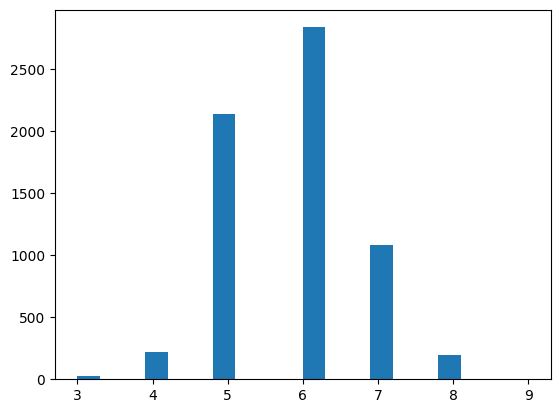

In [ ]:
plt.hist(data['quality'],20)

Ok cool, the distribution is pretty normal, so I don't think I have to do anything.

In [ ]:
data.columns = [col.replace(' ', '_') for col in data.columns] #the ripped data has spaces instead of underscores so i have to fix that

In [ ]:
predictors = [
    "fixed_acidity", "volatile_acidity", "citric_acid",
    "residual_sugar", "chlorides", "free_sulfur_dioxide", #is this too many?? Nahhhhh
    "total_sulfur_dioxide", "density", "pH", "sulphates",
    "alcohol", "is_red"
]

X = data[predictors].values #input
Y = data["quality"].values   #output

#Run Number 1

In [ ]:
with pm.Model() as model_wine:
    # Prior for the observation noise
    s= pm.HalfNormal("s", sigma=10)

    # WI don't think we need a transformation here but I may be wrong
    μ_ = pmb.BART("μ_", X, Y, m=50)

    # still no transformation
    μ = pm.Deterministic("μ", μ_)

    # Define the cutpoints for the ordered categories
    cutpoints = pm.Normal("cutpoints", mu=np.arange(10), sigma=1, shape=10, transform=tr.Ordered())

    # Define the ordered categorical likelihood
    y_obs = pm.OrderedLogistic("y_obs", eta=μ, cutpoints=cutpoints, observed=Y)

    # Sample from the posterior, i set a specific seed so I can get this specific run back
    idata = pm.sample(compute_convergence_checks=False, random_seed=42)

Output()

Output()

<Axes: xlabel='y_obs'>

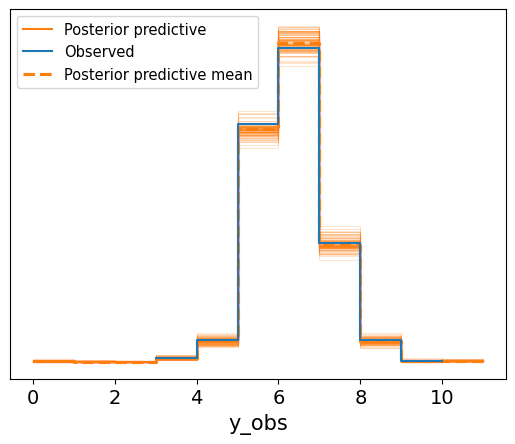

In [ ]:
pm.sample_posterior_predictive(idata,model_wine, extend_inferencedata=True)
az.plot_ppc(idata, num_pp_samples=100, colors=["C1", "C0", "C1"])

This is good!! The data could very feasibly have been one of the runs.

In [ ]:
posterior_mean = idata.posterior["μ"]

μ_hdi = az.hdi(ary=idata, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata, group="posterior_predictive", var_names=["y_obs"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/

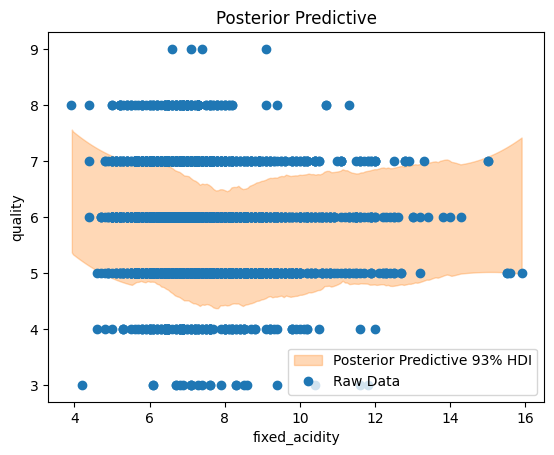

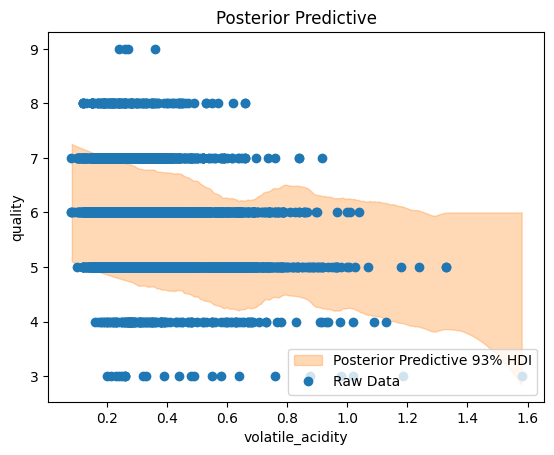

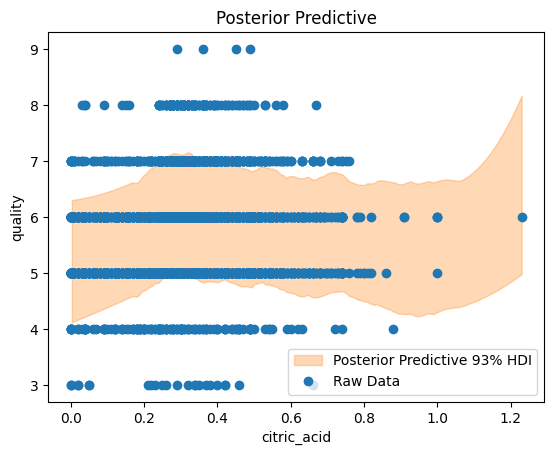

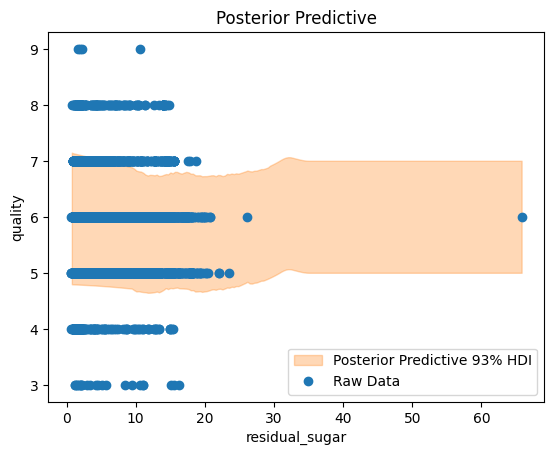

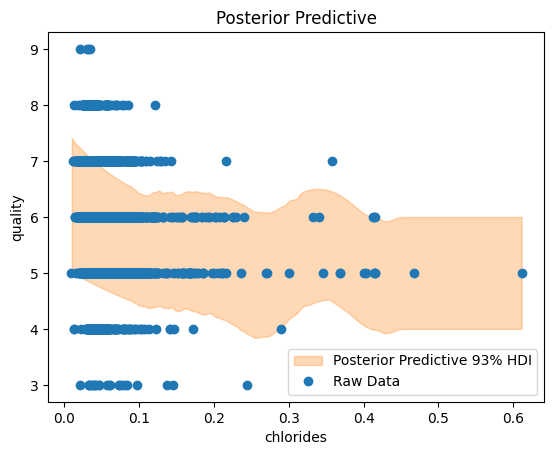

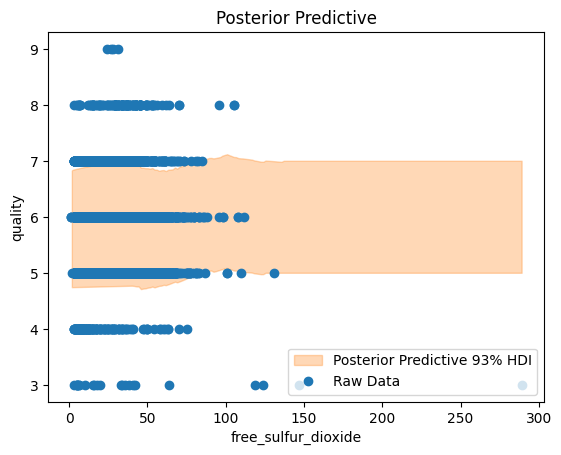

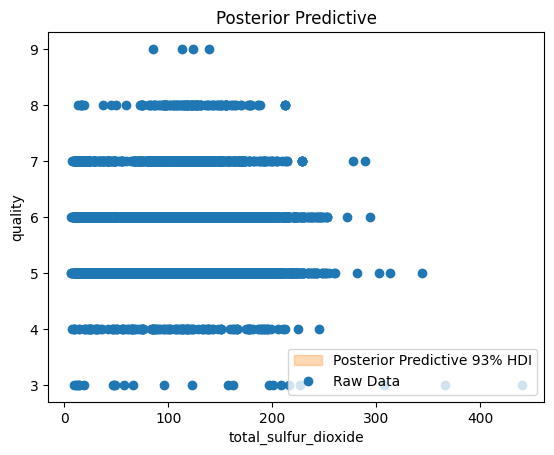

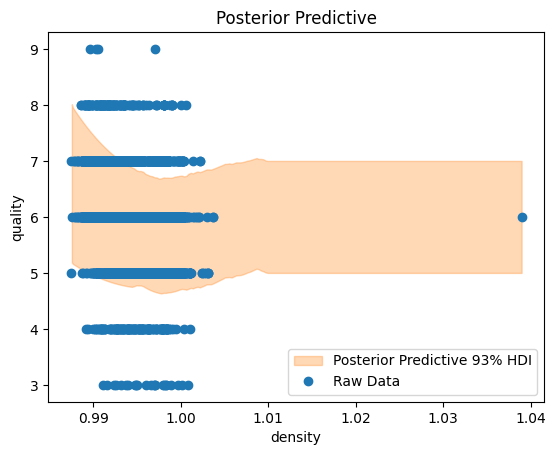

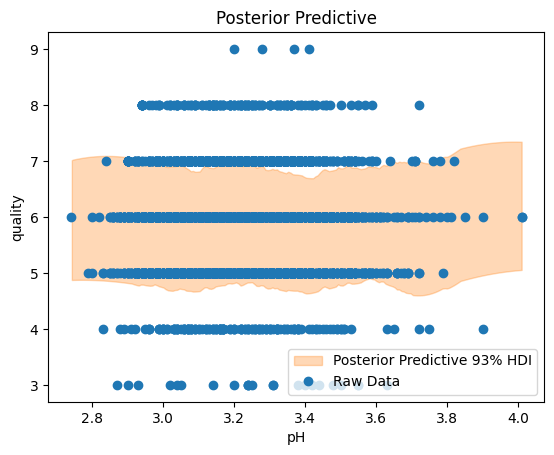

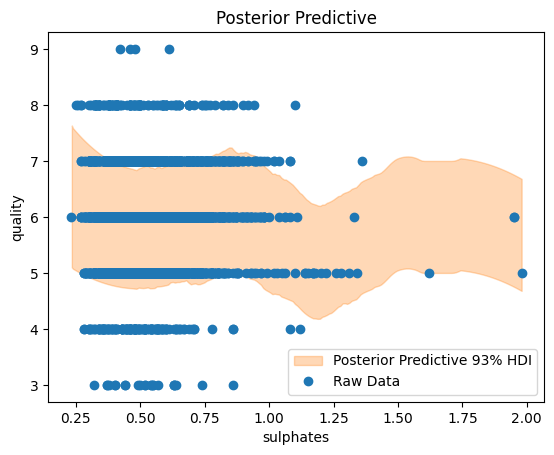

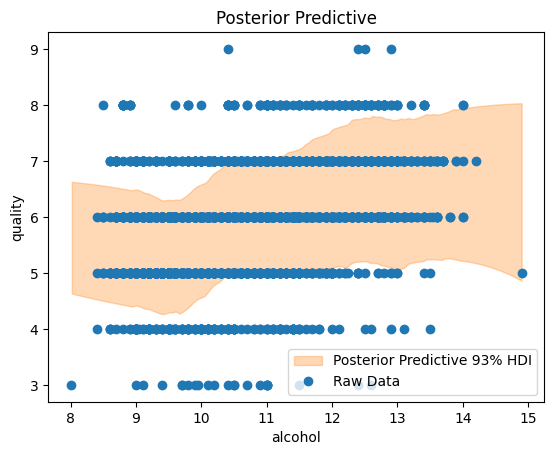

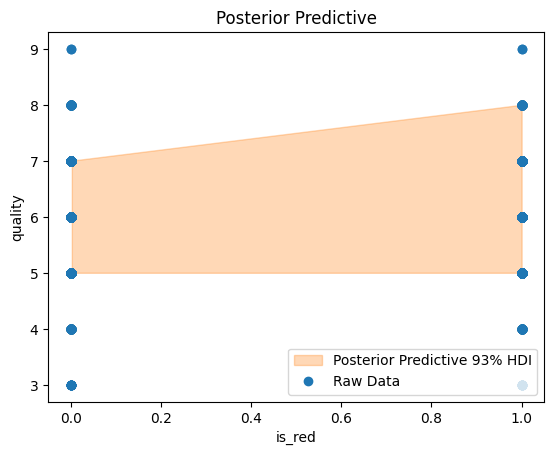

In [ ]:
for (i, predictor) in enumerate(predictors):
  index = predictors.index(predictor)
  idx = np.argsort(X[index])
  fig, ax = plt.subplots()

  az.plot_hdi(
    x=X[:,index],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive 93% HDI"},
  )

  ax.plot(data[predictor], data["quality"], "o", c="C0", label="Raw Data")
  ax.legend(loc="lower right")
  ax.set(
    title="Posterior Predictive",
    xlabel=predictor,
    ylabel="quality",
  );

Big long list of plots. These pictures look really bad... The issue is that the output is discrete, so there will inevitably just be a lot of stacked points, so even if 93% of the points were in the orange, it would be hard to tell. The variance for all of this is really big, and distinctions are mostly about density, so this visualization becomes kinda useless. It does predict that I'm gonna have a lot of horizontal lines in my pdp and ice plots. Many of these wind up looking like no correlation.

#PDP & ICE

In [ ]:
posterior_mean = idata.posterior["μ"]

μ_hdi = az.hdi(ary=idata, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata, group="posterior_predictive", var_names=["y_obs"]
).T

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:689: RuntimeWarning: All-NaN slice encountered
  x_data = np.linspace(np.nanmin(new_x), np.nanmax(new_x), 200)


array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>,
       <Axes: xlabel='X_3'>, <Axes: xlabel='X_4'>, <Axes: xlabel='X_5'>,
       <Axes: xlabel='X_6'>, <Axes: xlabel='X_7'>, <Axes: xlabel='X_8'>,
       <Axes: xlabel='X_9'>, <Axes: xlabel='X_10'>, <Axes: xlabel='X_11'>],
      dtype=object)

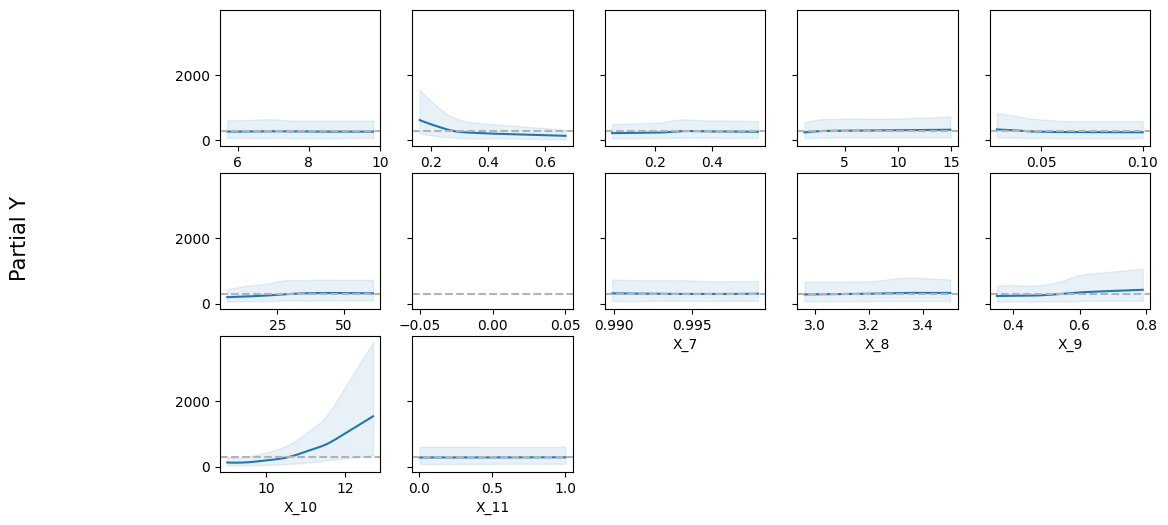

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

So we find that alcohol content, volatile acidity, (??) and sulfates are good predictors and there's a lot of useless stuff. This makes me think that a lot of je ne sais quoi (or bs) in rating wines that is not captured in this data.

In [ ]:
vi = pmb.compute_variable_importance(idata, μ_, X)

<Axes: ylabel='R²'>

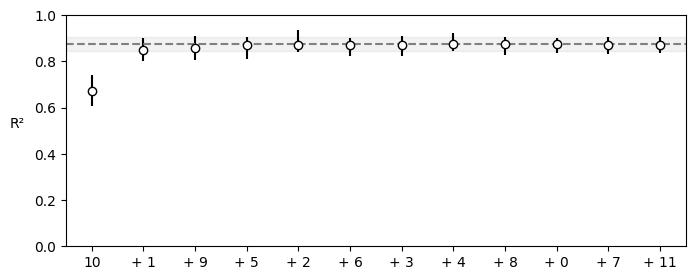

In [ ]:
pmb.plot_variable_importance(vi)

Same three variables rate the most important. Most of these are comfortably in the dark grey disregard zone.

#RUN 2

In [ ]:
predictors = [
   "volatile_acidity", "residual_sugar", "chlorides", "free_sulfur_dioxide", #is this too many?? Nahhhhh
   "sulphates",
   "alcohol", "is_red" #whether or not the wine is red showed up as not very important on the vi plot, but i refuse to believe that's true
]

X = data[predictors].values #input
Y = data["quality"].values   #output

I trimmed most of the useless variables except is_red which I refuse to believe is not useful

In [ ]:
with pm.Model() as model_wine:
    # Prior for the observation noise
    s= pm.HalfNormal("s", sigma=10)

    # WI don't think we need a transformation here but I may be wrong
    μ_ = pmb.BART("μ_", X, Y, m=50)

    # still no transformation
    μ = pm.Deterministic("μ", μ_)

    # Define the cutpoints for the ordered categories
    cutpoints = pm.Normal("cutpoints", mu=np.arange(10), sigma=1, shape=10, transform=tr.Ordered())

    # Define the ordered categorical likelihood
    y_obs = pm.OrderedLogistic("y_obs", eta=μ, cutpoints=cutpoints, observed=Y)

    # Sample from the posterior, i set a specific seed so I can get this specific run back
    idata = pm.sample(compute_convergence_checks=False, random_seed=42)

Output()

Fewer divergences now; that's neat.

Output()

<Axes: xlabel='y_obs'>

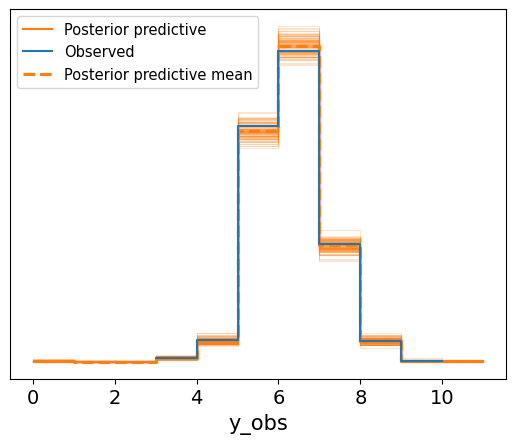

In [ ]:
pm.sample_posterior_predictive(idata,model_wine, extend_inferencedata=True)
az.plot_ppc(idata, num_pp_samples=100, colors=["C1", "C0", "C1"])

Still does fine

In [ ]:
posterior_mean = idata.posterior["μ"]

μ_hdi = az.hdi(ary=idata, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata, group="posterior_predictive", var_names=["y_obs"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/

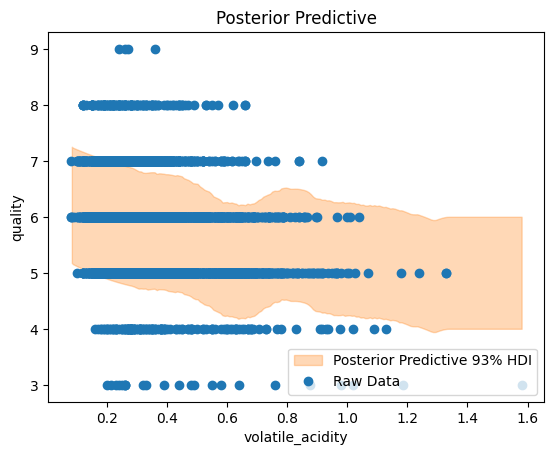

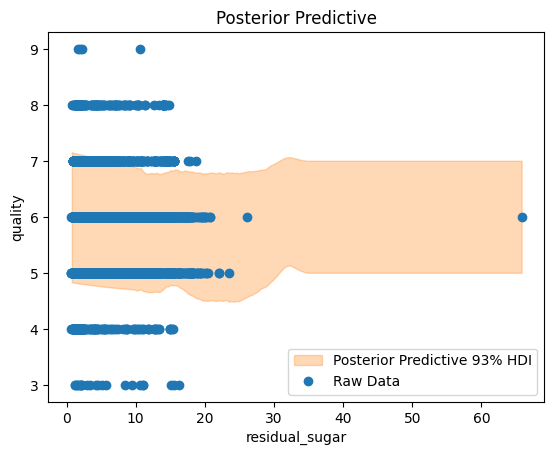

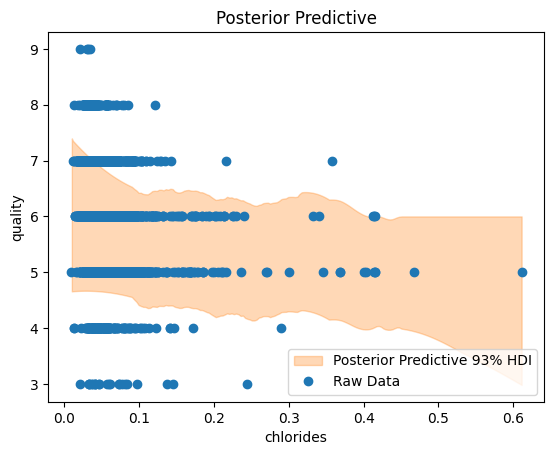

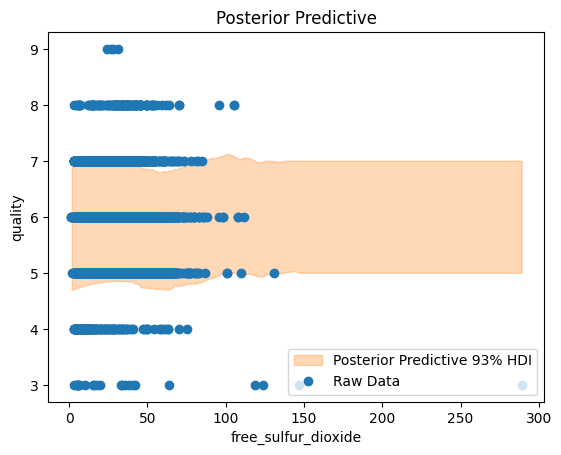

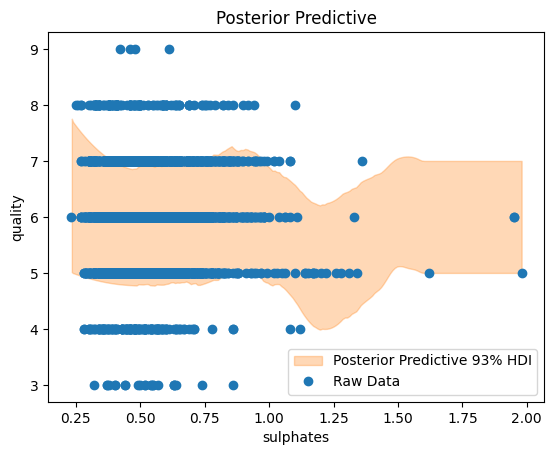

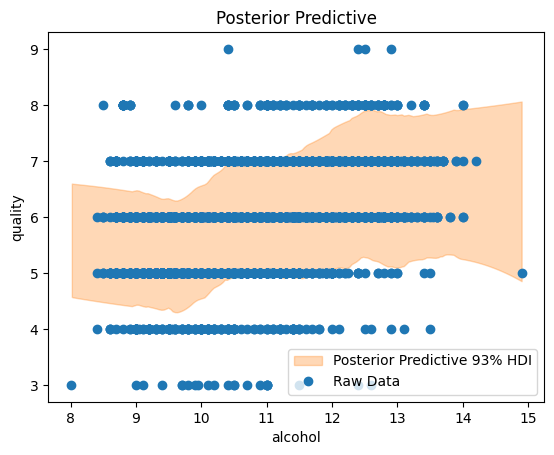

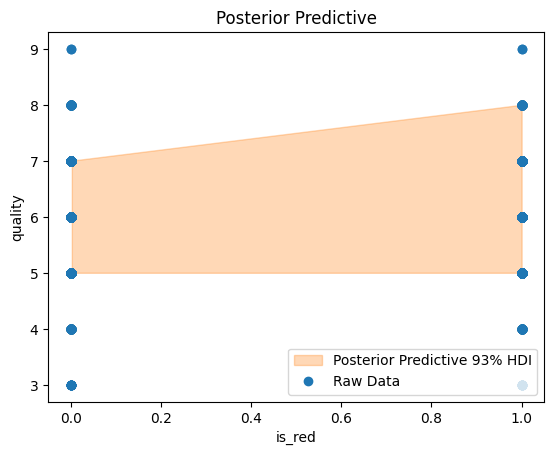

In [ ]:
for (i, predictor) in enumerate(predictors):
  index = predictors.index(predictor)
  idx = np.argsort(X[index])
  fig, ax = plt.subplots()

  az.plot_hdi(
    x=X[:,index],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive 93% HDI"},
  )

  ax.plot(data[predictor], data["quality"], "o", c="C0", label="Raw Data")  # Swapped x and y here
  ax.legend(loc="lower right")
  ax.set(
    title="Posterior Predictive",
    xlabel=predictor,
    ylabel="quality",
  );

pictures still look bad :(


In [ ]:
posterior_mean = idata.posterior["μ"]

μ_hdi = az.hdi(ary=idata, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata, group="posterior_predictive", var_names=["y_obs"]
).T

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>,
       <Axes: xlabel='X_3'>, <Axes: xlabel='X_4'>, <Axes: xlabel='X_5'>,
       <Axes: xlabel='X_6'>], dtype=object)

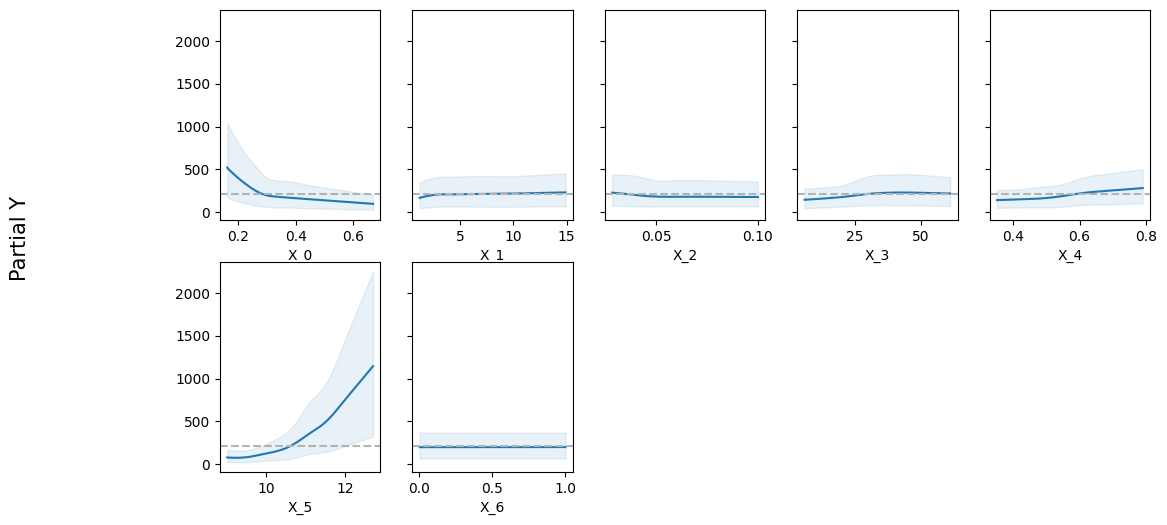

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

Now really looks like its almost just Alcohol and volatile acidity (still dont know what this is) that impact things.

PS: I looked it up and volatile acidity measures the level of some acids (like acetic acid) in the wine. More VA = more like vinegar = worse wine (in general)

In [ ]:
vi = pmb.compute_variable_importance(idata, μ_, X)

<Axes: ylabel='R²'>

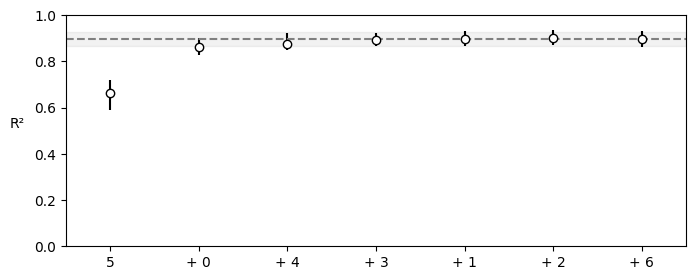

In [ ]:
pmb.plot_variable_importance(vi)

Still almost everything is useless

Ok! We're gonna try and make an ice plot with this new model. Wish me luck

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>,
       <Axes: xlabel='X_3'>, <Axes: xlabel='X_4'>, <Axes: xlabel='X_5'>,
       <Axes: xlabel='X_6'>], dtype=object)

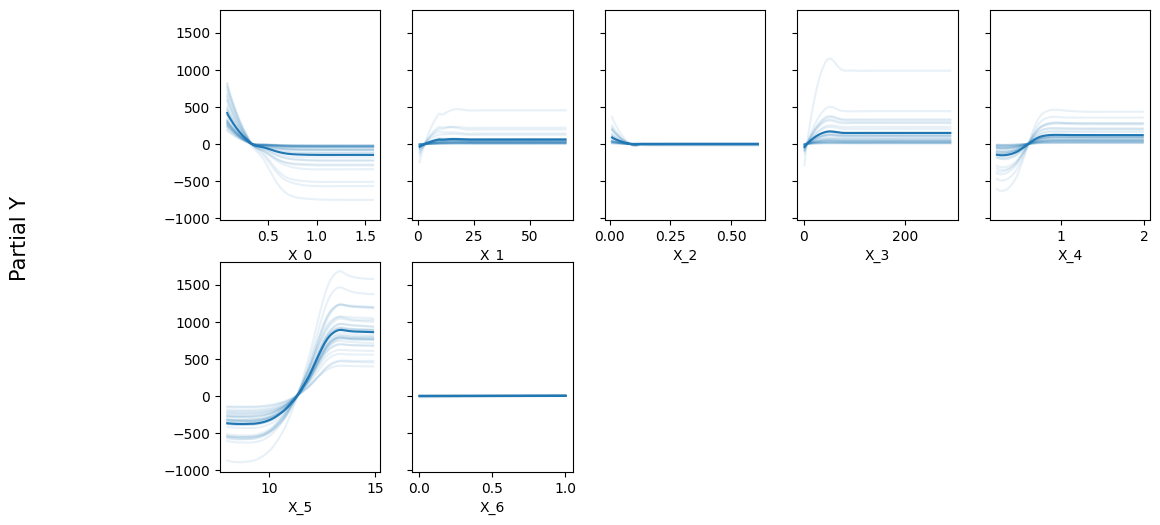

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

The model is not really unsure about the effects of anything ever (the slopes are lmost always the same everywhere. If anything, its not that sure how good extra alcohol is or how bad low alcohol is, and isn't sure how bad high volatile acidity is.

#Run 3

Ok so for funsies im gonna remove is_red and see what happens, i'll also take out the other useless predictors

In [ ]:
predictors = [
   "volatile_acidity", "residual_sugar", "alcohol" #only 3 remain
]

X = data[predictors].values #input
Y = data["quality"].values   #output

In [ ]:
with pm.Model() as model_wine:
    # Prior for the observation noise
    s= pm.HalfNormal("s", sigma=10)

    # WI don't think we need a transformation here but I may be wrong
    μ_ = pmb.BART("μ_", X, Y, m=50)

    # still no transformation
    μ = pm.Deterministic("μ", μ_)

    # Define the cutpoints for the ordered categories
    cutpoints = pm.Normal("cutpoints", mu=np.arange(10), sigma=1, shape=10, transform=tr.Ordered())

    # Define the ordered categorical likelihood
    y_obs = pm.OrderedLogistic("y_obs", eta=μ, cutpoints=cutpoints, observed=Y)

    # Sample from the posterior, i set a specific seed so I can get this specific run back
    idata = pm.sample(compute_convergence_checks=False, random_seed=42)

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    41            0.03        127          2.34 draws/s     0:14:13   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    187           0.05        127          1.20 draws/s     0:27:46   0:00:00

Output()

<Axes: xlabel='y_obs'>

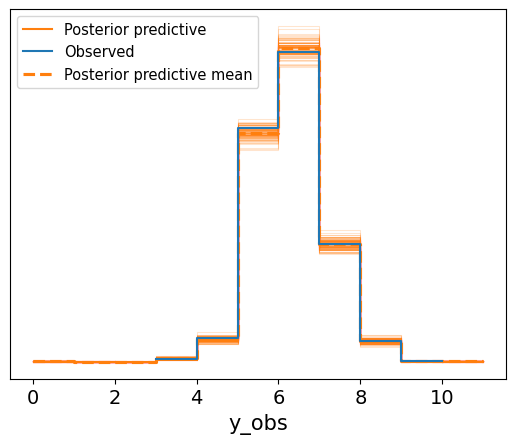

In [ ]:
pm.sample_posterior_predictive(idata,model_wine, extend_inferencedata=True)
az.plot_ppc(idata, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [ ]:
posterior_mean = idata.posterior["μ"]

μ_hdi = az.hdi(ary=idata, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata, group="posterior_predictive", var_names=["y_obs"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


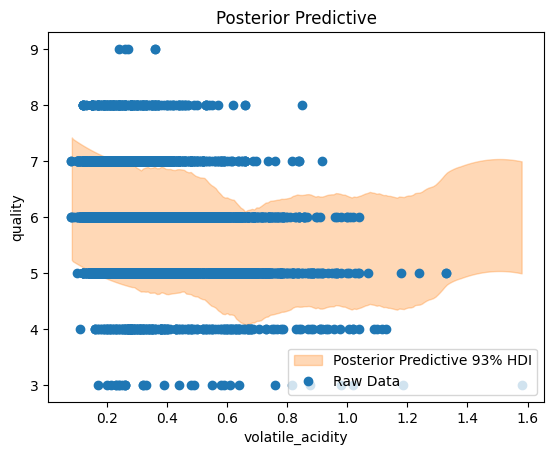

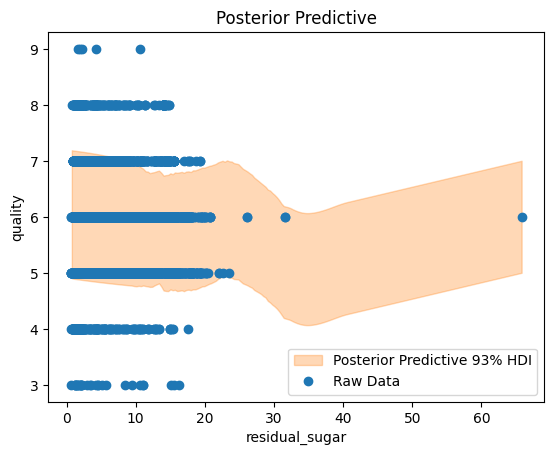

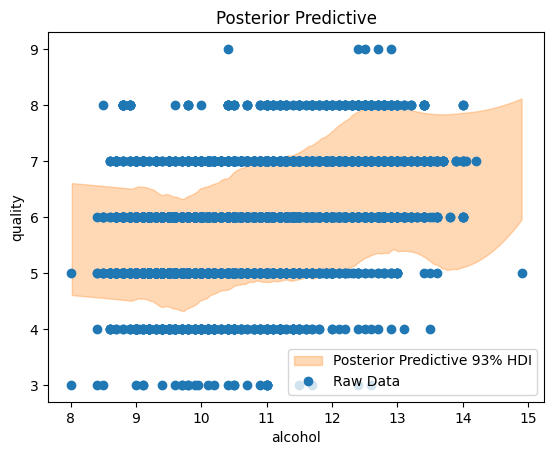

In [ ]:
for (i, predictor) in enumerate(predictors):
  index = predictors.index(predictor)
  idx = np.argsort(X[index])
  fig, ax = plt.subplots()

  az.plot_hdi(
    x=X[:,index],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive 93% HDI"},
  )

  ax.plot(data[predictor], data["quality"], "o", c="C0", label="Raw Data")  # Swapped x and y here
  ax.legend(loc="lower right")
  ax.set(
    title="Posterior Predictive",
    xlabel=predictor,
    ylabel="quality",
  );

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>],
      dtype=object)

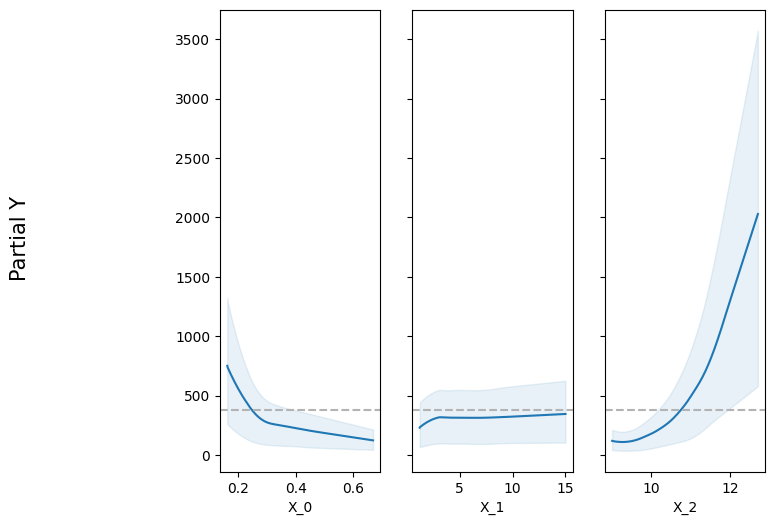

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In [ ]:
vi = pmb.compute_variable_importance(idata, μ_, X)

<Axes: ylabel='R²'>

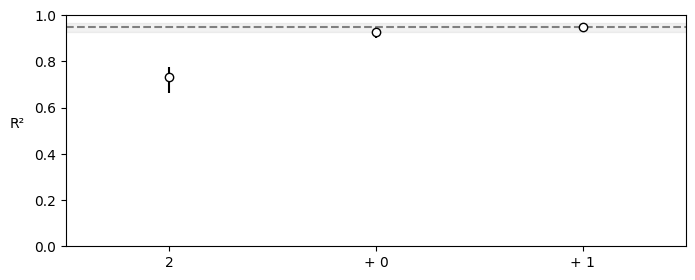

In [ ]:
pmb.plot_variable_importance(vi)

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>],
      dtype=object)

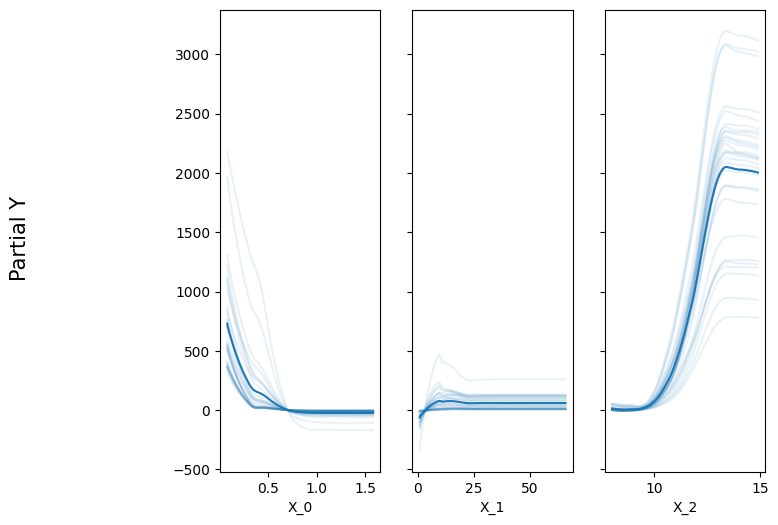

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

Never mind the model is still good

This is a really strange position to find myself in because it essentially means that very little information is needed to predict the wine scores of quality (or at least that more information isn't helpful and the rest is just random). This seems to indicate that a lot of the variance in wine scores is just random and doesn't align with any other measurable characteristics. This aligns with my preconcieved notions about the impericism of wine experts (that it is low).